# Burgers Equation

In this notebook I will solve the Burgers equation $u_t + u \cdot u_x=0$ using as an initial condition the profile $u(x,t=0)= 10 \exp{[-(x-x_0)^2]}$ with $x_0=5$. I chose the domain in a way that $x\in [0,10]$ with periodic boundary conditions. There will be two ways I will adrees the problem with: by solving the non conservative equation, or the conservative equation. The results I expect are both convergent, but in the non conservative form to the wrong solution.

## Non conservative form

In this section I will solve the non conservative form of the Burgers equation. I will try to change the resolution to see that no matter how precise I choose to be, I always end up having a convergence to the wrong solution. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the domain
L = 10.0     # Domain length
nx = 101    # Number of grid points
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

##print(x,'\n',dx) #just a check

# Define the time step and the final time
cf = 0.5

# choose the dt wisely: 

t_final = 0.5


# Define the initial condition
x0=5
u_initial = 10 * np.exp(-(x-x0)**2)

# Initialize the solution array
u_current = u_initial.copy()

dt = np.min(cf*dx/u_initial)  

#we create arrays where we will store the time and the l2norm
l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time=[]
time.append(0.0)

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)

nx= 101
dx= 0.1
dt= 0.005
Number of iterations= 100.0


## Solution of the equation: 

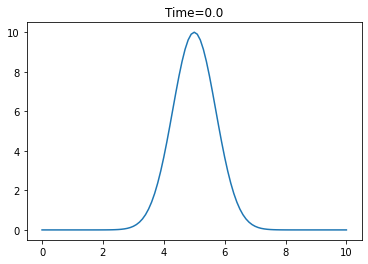

In [2]:
# Initialize time and iteration counter
t = 0.0
i = 0

#save the initial conditions
plt.plot(x, u_current)
plt.title('Time='+str(round(t,2)))

# add the array for the overall evolutions of the solutions over time: 

total_sol = []

#solve the advection equation
while t < t_final:
    
    total_sol.append(u_current)
    
    u_next = u_current - dt / dx * u_current * (u_current - np.roll(u_current, 1))    
    
    # Update the solution
    u_current = u_next.copy()
    
    
    #advance the time 
    t += dt
    i += 1
    
    #compute the l2 norm and add the time to the time vector
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)

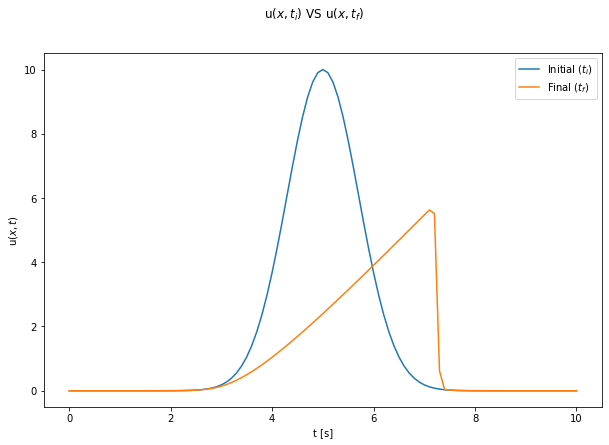

In [3]:
# Plot the final solution
plt.figure(figsize = (10, 6.5))
plt.plot(x, u_initial, label='Initial ($t_i$)')
plt.plot(x, u_current, label='Final ($t_f$)')
plt.legend()
plt.xlabel("t [s]")
plt.ylabel("$\mathrm{u}(x, t)$")
plt.suptitle("$\mathrm{u}(x, t_i)$ VS $\mathrm{u}(x, t_f)$")
plt.show()

See the values of the norm as time passes: 

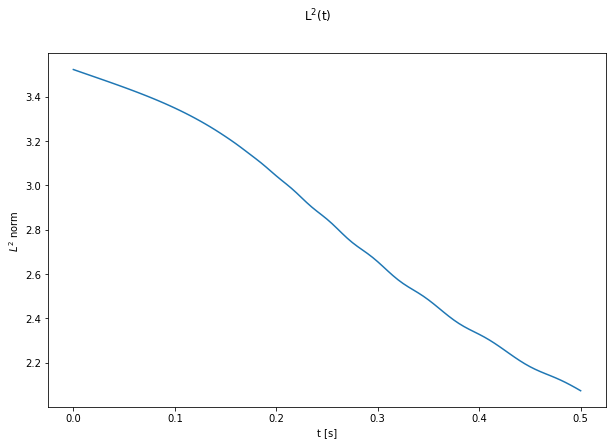

In [4]:
plt.figure(figsize = (10, 6.5))
plt.plot(time,l2norm)
plt.xlabel("t [s]")
plt.ylabel("$L^2$ norm")
plt.suptitle("$\mathrm{L^2(t)}$")
plt.show()

### FuncAnimation animations:

Here I just report an additional code I developed to see animation without having to save the images every time.

In [5]:
import matplotlib.animation as animation
import matplotlib
matplotlib.use("TkAgg")

<IPython.core.display.Javascript object>


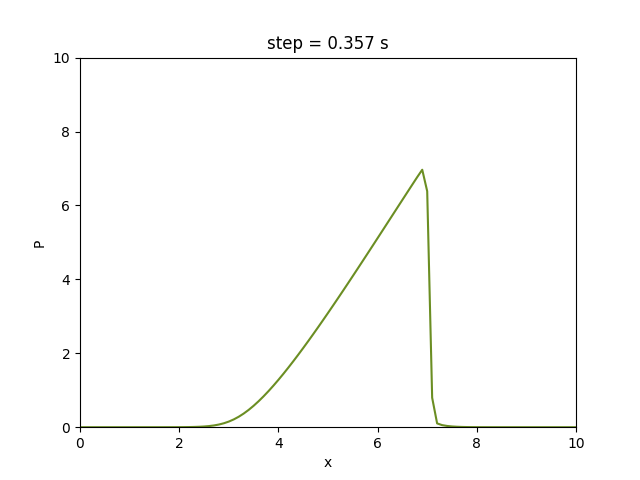

In [7]:
%matplotlib notebook

fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('P')
plotLine, = ax.plot(x, np.zeros(len(x))*np.NaN, '-', c='olivedrab')
plotTitle = ax.set_title("t=0")
ax.set_ylim(0,10.)
ax.set_xlim(0,10)


def solution(t):
    p = np.array(total_sol)[t]
    return p


def animate(t):
    pp = solution(t)
    plotLine.set_ydata(pp)
    plotTitle.set_text(f"step = {t/98 * 0.5:.3f} s")
    #ax.relim() # use if autoscale desired
    #ax.autoscale()
    return [plotLine,plotTitle]



ani = animation.FuncAnimation(fig, func=animate, frames=np.arange(0, len(total_sol), 2), blit=True)
ani.save('non_cons.gif')
plt.show()

## Conservative form: 

In this section I will solve the conservative form of the Burgers equation, seeing that it converges to the right solution.

In [9]:
# Define the domain
L_cons = 10.0     # Domain length
nx_cons = 101    # Number of grid points
dx_cons = L/(nx-1)   # Grid spacing
x_cons = np.linspace(0, L, nx)

##print(x,'\n',dx) #just a check

# Define the time step and the final time
cf_cons = 0.5

t_final_cons = 0.5

# Define the initial condition
x0_cons=5
u_initial_cons = 10 * np.exp(-(x_cons-x0_cons)**2)

# Initialize the solution array
u_current_cons = u_initial_cons.copy()

dt_cons = np.min(cf_cons*dx_cons/u_initial_cons) 

#we create arrays where we will store the time and the l2norm
l2norm_cons=[]
l2norm_cons.append(np.sqrt(np.sum(u_current_cons**2)/len(u_current_cons)))

time_cons=[]
time_cons.append(0.0)

print('nx=',nx_cons)
print('dx=',dx_cons)
print('dt=',dt_cons)
print('Number of iterations=',t_final_cons/dt_cons)

nx= 101
dx= 0.1
dt= 0.005
Number of iterations= 100.0


### Solution of the equation: 

<IPython.core.display.Javascript object>


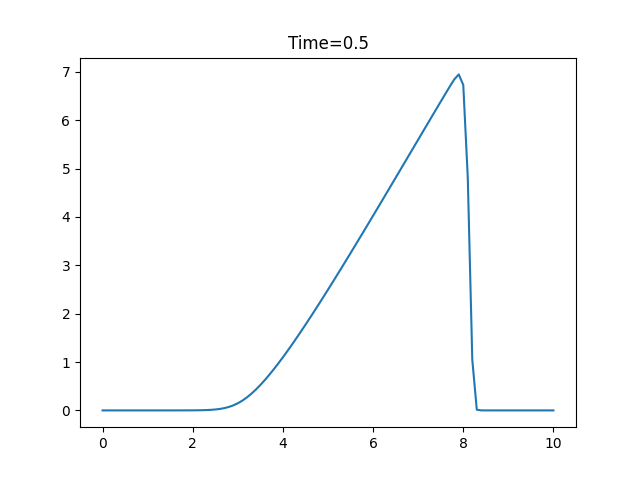

In [11]:
# Initialize time and iteration counter
t_cons = 0.0
i_cons = 0

plt.plot(x_cons, u_current_cons)
plt.title('Time='+str(round(t_cons,2)))

# add the array for the overall evolutions of the solutions over time: 

total_sol_cons = []

#solve the advection equation
while t_cons < t_final_cons:
    
    total_sol_cons.append(u_current_cons)
    
    u_next_cons = u_current_cons - dt_cons / dx_cons * (1 / 2 * u_current_cons**2 - 1 / 2 * np.roll(u_current_cons, 1)**2)    
    
    # Update the solution
    u_current_cons = u_next_cons.copy()
    
    
    #advance the time 
    t_cons += dt_cons
    i_cons += 1
    
    #compute the l2 norm and add the time to the time vector
    l2norm_cons.append(np.sqrt(np.sum(u_current_cons**2)/len(u_current_cons)))
    time_cons.append(t_cons)

<IPython.core.display.Javascript object>


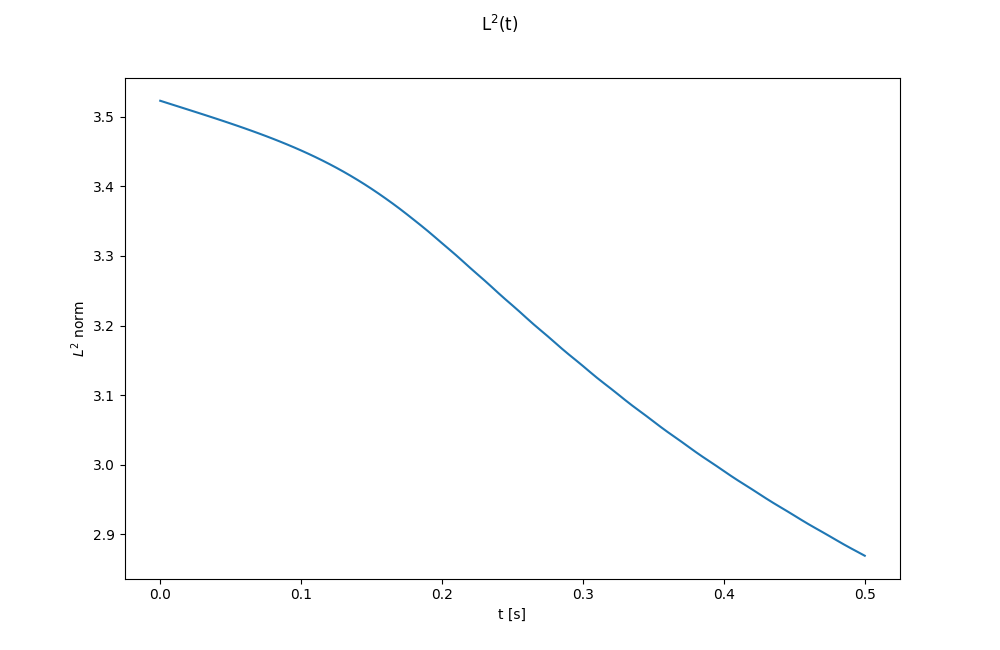

In [12]:
plt.figure(figsize = (10, 6.5))
plt.plot(time_cons,l2norm_cons)
plt.xlabel("t [s]")
plt.ylabel("$L^2$ norm")
plt.suptitle("$\mathrm{L^2(t)}$")
plt.show()

In [ ]:
%matplotlib notebook

fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('P')
plotLine, = ax.plot(x_cons, np.zeros(len(x_cons))*np.NaN, '-', c='salmon')
plotTitle = ax.set_title("t=0")
ax.set_ylim(0,10.)
ax.set_xlim(0,10)


def solution(t):
    p = np.array(total_sol_cons)[t]
    return p


def animate(t):
    pp = solution(t)
    plotLine.set_ydata(pp)
    plotTitle.set_text(f"time = {t/98 * 0.5:.3f} s")
    #ax.relim() # use if autoscale desired
    #ax.autoscale()
    return [plotLine,plotTitle]



ani = animation.FuncAnimation(fig, func=animate, frames=np.arange(0, len(total_sol_cons), 2), blit=True)
ani.save('flux_cons_form.gif')
plt.show()

For the sake of completeness I here report both the simulations, to see the results. On the right we will see the conservative form and on the left the non conservative form. It can be seen that the non conservative form converges to a value $<8$, while the conservative form converges to the right solution. 

### Non conservative
<img src="non_cons.gif" align="left" width="485px"/> 

### Conservative
<img src="flux_cons_form.gif" align="right" width="485px"/>